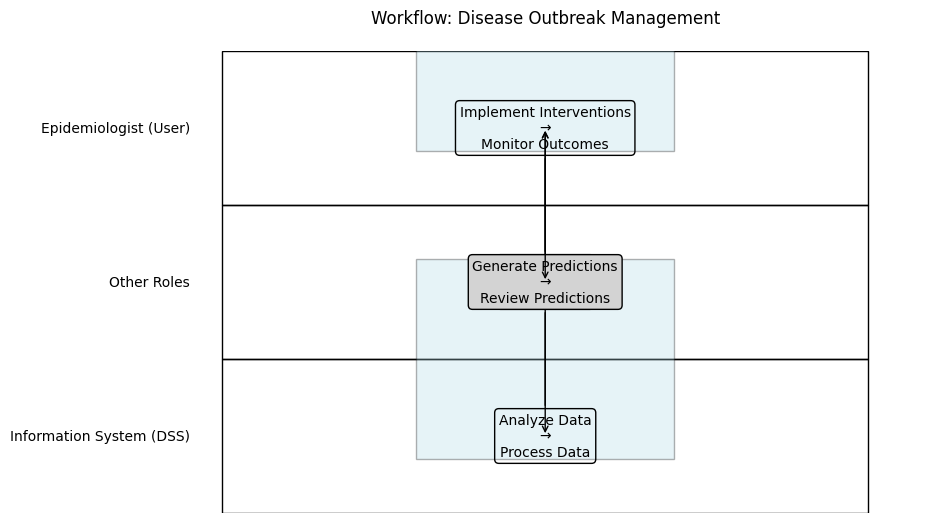

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the lanes and activities
lanes = ['Epidemiologist (User)', 'Other Roles', 'Information System (DSS)']
activities = [
    ('Epidemiologist (User)', 'Collect Data', 'Other Roles', 'Provide Data'),
    ('Epidemiologist (User)', 'Analyze Data', 'Information System (DSS)', 'Process Data'),
    ('Information System (DSS)', 'Generate Predictions', 'Other Roles', 'Review Predictions'),
    ('Other Roles', 'Implement Interventions', 'Epidemiologist (User)', 'Monitor Outcomes')
]

# Draw swimlanes
for i, lane in enumerate(lanes):
    ax.add_patch(Rectangle((0, 1 - (i+1)/len(lanes)), 1, 1/len(lanes), edgecolor='black', facecolor='none'))
    plt.text(-0.05, 1 - (i+0.5)/len(lanes), lane, va='center', ha='right')

# Add activities
for activity in activities:
    lane1, act1, lane2, act2 = activity
    y1 = 1 - (lanes.index(lane1) + 0.5)/len(lanes)
    y2 = 1 - (lanes.index(lane2) + 0.5)/len(lanes)
    ax.annotate(f'{act1}\n→\n{act2}', xy=(0.5, y1), xytext=(0.5, y2), 
                arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center', va='center', fontsize=10, 
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgrey' if lane1 == 'Information System (DSS)' else 'none'))

# Highlight DSS steps
dss_steps = ['Process Data', 'Generate Predictions']
for step in dss_steps:
    for activity in activities:
        lane1, act1, lane2, act2 = activity
        if step in (act1, act2):
            y1 = 1 - (lanes.index(lane1) + 0.5)/len(lanes)
            y2 = 1 - (lanes.index(lane2) + 0.5)/len(lanes)
            ax.add_patch(Rectangle((0.5 - 0.2, y1 - 0.05), 0.4, abs(y1 - y2) + 0.1, edgecolor='black', facecolor='lightblue', alpha=0.3))

# Formatting
plt.xlim(-0.1, 1.1)
plt.ylim(0, 1)
ax.axis('off')
plt.title('Workflow: Disease Outbreak Management', pad=20)

# Display the plot
plt.show()
